# Introdução

Um outra ferramenta para análise no domínio da frequência é a transformada Wavelet. A operação desta transformada é realizada pela convolução com um sinal previamente conhecido, e o resultado, diferente da transformada de Fourier representa uma semelhança entre o sinal de entrada e o sinal usado como base.

Dentre as funções base para a transformada Wavelet, detaca-se o operador Haar, que utiliza sinais quadrados de frequência fixas para extrair informações pertinentes ao sinal. A representação matemática dar-se da seguinte forma:

$$ T = HFH $$

F é a matriz de entrada, H a matriz wavelet e T o resultado da trasnformada.

# Discussão do método

O método da transformada Wavelet, com funções de base Haar extrair informações presentes na imagem e promover uma compressão do sinal.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

- Abrir imagem:

In [ ]:
img = np.array(cv2.imread('house.tif', cv2.IMREAD_GRAYSCALE))

plt.figure(1, figsize=(5,5))
plt.axis('off')
plt.imshow(img, 'gray')
plt.title("Imagem original")
plt.show()

In [ ]:
edges = cv2.Canny(img,50,150,apertureSize = 3)

plt.figure(2, figsize=(5,5))
plt.axis('off')
plt.imshow(edges, 'gray')
plt.title("Imagem binarizada")
plt.show()

In [ ]:
numTries = 10
Images = np.zeros([numTries,img.shape[0],img.shape[1]])
numVotes = [10,30,50,70,90,110,130,150,170,180]

for l in range (0,numTries):

    lines = cv2.HoughLines(edges,1,np.pi/180,numVotes[l])
    Images[l,:,:] = img
    
    for k in range (0, lines.shape[0]):
        for rho,theta in lines[k]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))

            cv2.line(Images[l,:,:],(x1,y1),(x2,y2),(0,0,255),2)

In [ ]:
plt.figure(3, figsize=(15,30))
for k in range (1,11):
    plt.subplot(3+1,3,k)
    plt.axis('off')
    plt.imshow(Images[k-1,:,:], 'gray')
    plt.title("N° de pontos por reta igual a %d" %numVotes[k-1])
plt.show()

# Com Circulos

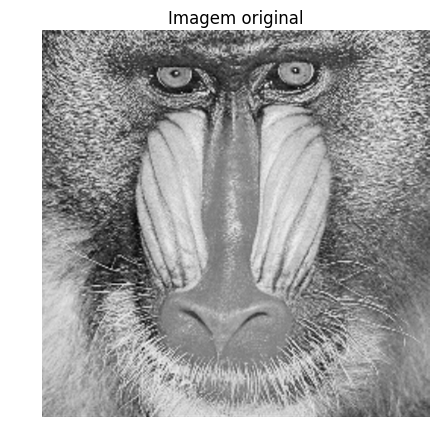

In [116]:
img2 = np.array(cv2.imread('mandril_gray.tif', cv2.IMREAD_GRAYSCALE))
img2_copy = img2

plt.figure(3+1, figsize=(5,5))
plt.axis('off')
plt.imshow(img2, 'gray')
plt.title("Imagem original")
plt.show()

In [117]:
circles = cv2.HoughCircles(img2_copy,cv2.HOUGH_GRADIENT,1,50,
                            param1=250,param2=10,minRadius=21,maxRadius=23)

In [118]:
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img2_copy,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img2_copy,(i[0],i[1]),2,(0,0,255),3)

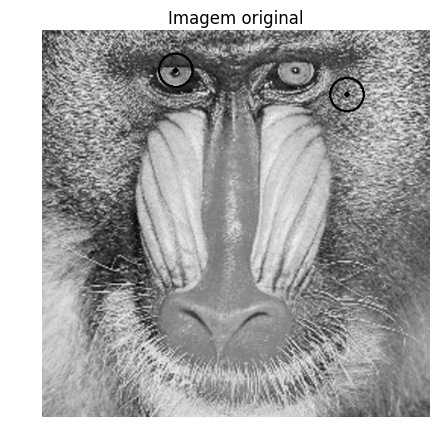

In [119]:
plt.figure(5, figsize=(5,5))
plt.axis('off')
plt.imshow(img2_copy, 'gray')
plt.title("Imagem original")
plt.show()

O resultado da transformada de haar são três subprodutos da imagem original, implementados da seguinte forma: (i) a imagem original passa por uma filtragem passa-alta resultando em três imagens, chamadas de coeficientes, com informações pertinentes a linhas horizontais, verticais e diagonais; (ii) após isso as imagens passam por uma filtragem passa-baixa, com o intuito de preservar as características originais e por fim (iii) passam por um processo de downscalling.

# Conclusões

A transformada Haar pode ser uma ferramenta útil quando trata-se de compreensão de imagens, pois as informações extraídas com a aplicação desssa transformada são de aproximações e predições da imagem original, sofrendo um processo de redução de dimensionailidade.